In [1]:
import sys
sys.path.append("../data")
sys.path.append("../functions")

In [2]:
from metricsFunctions import optimalTau, calc_metrics, sgmmResults, metrics_cluster
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from supervisedGmm import  SupervisedGMM

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
sparcs = pd.read_csv("../data/sparcs25%Newborn_DeHos_Outflow_NYC_only.csv") 

newborn = sparcs.sample(frac=1,random_state=1512)


d_newborn_tr, d_newborn_te = train_test_split(newborn, test_size=0.2, random_state = 1512)

print(d_newborn_tr.shape[0], d_newborn_tr.shape[1])
print(d_newborn_tr.iloc[0,0:10])

55364 169
ER                  0
Low_Birth_Weight    0
inflow              0
Bronx               0
Kings               1
Manhattan           0
Queens              0
Richmond            0
Female              0
Male                1
Name: 17484, dtype: int64


In [5]:
#VALIDATION ON CLUSTERS
#RUN VALIDATION ON NUMBER OF CLUSTERS BASED ON AUC
"""
import time

train, val = train_test_split(d_newborn_tr, test_size = 0.2, random_state = 1512)
y_train, y_val = train.iloc[:,-1], val.iloc[:,-1]

print( train.shape, val.shape )

#SET SGMM PARAMETERS
#regularization parameters
C = [0.01, 0.1, 1, 5, 10, 15, 20, 50]
max_iter2 = 30

train_np = train.iloc[:,0:-1].values
val_np = val.iloc[:,0:-1].values

y_train_np = y_train.values
y_val_np = y_val.values

test_re = []
train_re = []

start = time.time()

#test clusters 0-12
for i in range(2,25):
    print("\n\n\nTRAINING WITH {} CLUSTERS".format(i))
    model = SupervisedGMM(C = C, max_iter2 = max_iter2, n_clusters = i, verbose = 0)
    model = model.fit(Xtrain = train_np, ytrain = y_train_np)
    probTrain = model.predict_proba( train_np )
    probTest = model.predict_proba( val_np )
    results = sgmmResults( model, probTest.copy(), probTrain.copy(), y_val_np.copy(), y_train_np.copy(), tau = None,
                mode = 0)
    testmetrics = results['testMet']
    trainMetrics = results[ 'trainMet']
    test_re.append( testmetrics )
    train_re.append( trainMetrics )
    
end = time.time() - start
print("time elapsed: {}".format( end ))
"""

'\nimport time\n\ntrain, val = train_test_split(d_newborn_tr, test_size = 0.2, random_state = 1512)\ny_train, y_val = train.iloc[:,-1], val.iloc[:,-1]\n\nprint( train.shape, val.shape )\n\n#SET SGMM PARAMETERS\n#regularization parameters\nC = [0.01, 0.1, 1, 5, 10, 15, 20, 50]\nmax_iter2 = 30\n\ntrain_np = train.iloc[:,0:-1].values\nval_np = val.iloc[:,0:-1].values\n\ny_train_np = y_train.values\ny_val_np = y_val.values\n\ntest_re = []\ntrain_re = []\n\nstart = time.time()\n\n#test clusters 0-12\nfor i in range(2,25):\n    print("\n\n\nTRAINING WITH {} CLUSTERS".format(i))\n    model = SupervisedGMM(C = C, max_iter2 = max_iter2, n_clusters = i, verbose = 0)\n    model = model.fit(Xtrain = train_np, ytrain = y_train_np)\n    probTrain = model.predict_proba( train_np )\n    probTest = model.predict_proba( val_np )\n    results = sgmmResults( model, probTest.copy(), probTrain.copy(), y_val_np.copy(), y_train_np.copy(), tau = None,\n                mode = 0)\n    testmetrics = results[\'tes

In [6]:
#PICK THE CLUSTERS
"""
columns = test_re[0].columns
pdi = pd.DataFrame(np.zeros(shape = [len(test_re), test_re[0].shape[1]]), columns = columns)
pdi_tr = pd.DataFrame(np.zeros(shape = [len(train_re), train_re[0].shape[1]]), columns = columns)

for i, panda in enumerate(test_re):
     pdi.iloc[i,:] = panda.iloc[0,:]
        
for i, panda in enumerate(train_re):
     pdi_tr.iloc[i,:] = panda.iloc[0,:]

pdi.round(6)
#BASED ON THAT WE PICK 9 CLUSTERS
"""

'\ncolumns = test_re[0].columns\npdi = pd.DataFrame(np.zeros(shape = [len(test_re), test_re[0].shape[1]]), columns = columns)\npdi_tr = pd.DataFrame(np.zeros(shape = [len(train_re), train_re[0].shape[1]]), columns = columns)\n\nfor i, panda in enumerate(test_re):\n     pdi.iloc[i,:] = panda.iloc[0,:]\n        \nfor i, panda in enumerate(train_re):\n     pdi_tr.iloc[i,:] = panda.iloc[0,:]\n\npdi.round(6)\n#BASED ON THAT WE PICK 9 CLUSTERS\n'

In [7]:
#pdi_tr.round(6)

In [8]:
#TRAIN THE MODEL WITH 9 CLUSTERS
d_newborn_tr, d_newborn_te = train_test_split(sparcs, test_size=0.2, random_state = 1512)
Xtrain, Xtest = d_newborn_tr.iloc[:,0:-1].values, d_newborn_te.iloc[:,0:-1].values
ytrain, ytest = d_newborn_tr.iloc[:,-1].values.astype(int), d_newborn_te.iloc[:,-1].values.astype(int)

C = [0.01, 0.1, 1, 5, 10, 15, 20, 50]
max_iter2 = 30
n_clusters = 8

model = SupervisedGMM(C = C, max_iter2 = max_iter2, n_clusters = n_clusters, verbose = 0)
model = model.fit(Xtrain = Xtrain, ytrain = ytrain)



GMM iteration: 0, error: 0.041082391077510154
GMM iteration: 1, error: 0.026343175775928748
GMM iteration: 2, error: 0.007354857358502225
GMM iteration: 3, error: 0.002006123385715146
GMM iteration: 4, error: 0.0007039830451546197


In [9]:
#TAKE THE STATISTICS OF THE MODEL
#take probabilities of test and train
probTrain = model.predict_proba( Xtrain )
probTest = model.predict_proba( Xtest )

#take the results
results_last = sgmmResults( model, probTest.copy(), probTrain.copy(), ytest, ytrain, tau = None,
                mode = 0)

train_metrics = results_last["trainMet"]
test_metrics = results_last["testMet"]

print(Xtrain.shape)

(55364, 168)


In [10]:
results_last

{'testMet':    cluster     size  high_cost%  low_cost%      TP      TN      FP      FN  \
 0     -1.0  13842.0    0.249169   0.750831  2065.0  8142.0  2251.0  1384.0   
 
         FPR  specificity  sensitivity  precision  accuracy  balanced accuracy  \
 0  0.216588     0.783412     0.598724   0.478452  0.737393           0.691068   
 
          f1      auc  
 0  0.531874  0.76247  ,
 'trainMet':    cluster     size  high_cost%  low_cost%      TP       TN      FP      FN  \
 0     -1.0  55364.0    0.250217   0.749783  8599.0  32864.0  8647.0  5254.0   
 
         FPR  specificity  sensitivity  precision  accuracy  balanced accuracy  \
 0  0.208306     0.791694     0.620732   0.498608  0.748916           0.706213   
 
          f1       auc  
 0  0.553008  0.778336  ,
 'yTest': array([0., 0., 0., ..., 0., 0., 1.]),
 'yTrain': array([1., 0., 0., ..., 0., 0., 0.]),
 'memberTr': array([[1.73537145e-05, 1.75520308e-05, 9.99562421e-01, ...,
         1.55459594e-05, 1.44318803e-05, 1.60135196e

In [11]:
train_metrics.round(3)

,cluster,size,high_cost%,low_cost%,TP,TN,FP,FN,FPR,specificity,sensitivity,precision,accuracy,balanced accuracy,f1,auc
0,-1.0,55364.0,0.25,0.75,8599.0,32864.0,8647.0,5254.0,0.208,0.792,0.621,0.499,0.749,0.706,0.553,0.778


OVERALL METRICS ON TEST DATA WITH 9 CLUSTERS

In [12]:
test_metrics.round(3)

,cluster,size,high_cost%,low_cost%,TP,TN,FP,FN,FPR,specificity,sensitivity,precision,accuracy,balanced accuracy,f1,auc
0,-1.0,13842.0,0.249,0.751,2065.0,8142.0,2251.0,1384.0,0.217,0.783,0.599,0.478,0.737,0.691,0.532,0.762


PER CLUSTER STATISTICS

In [13]:
#get memberships and labels
memb_train = model.predict_GMMS(Xtrain)
memb_test = model.predict_GMMS(Xtest)

#get hard labels
testlabels = np.argmax(memb_test, axis = 1)
trainlabels = np.argmax(memb_train, axis = 1)

#get logistic regression per cluster models
per_cluster_regressions = model.LogRegr

#het the per cluster metrics
clust_Train, clust_Test = metrics_cluster(models = per_cluster_regressions, ytrain = ytrain, ytest = ytest,
                                         testlabels = testlabels, trainlabels = trainlabels, Xtrain = Xtrain,
                                          Xtest = Xtest)

In [14]:
#PRINT CLUSTER TEST
print("PER CLUSTER METRICS FOR TEST DATA\n")
print(clust_Test.sort_values(by = "high_cost%").reset_index(drop = True))
print("\n\n\nPER CLUSTER METRICS FOR TRAINING DATA\n")
print(clust_Train.sort_values(by = "high_cost%").reset_index(drop = True))

PER CLUSTER METRICS FOR TEST DATA

   cluster    size  high_cost%  low_cost%     TP      TN     FP     FN  \
0      5.0  1559.0    0.178961   0.821039  171.0  1067.0  213.0  108.0   
1      0.0  3104.0    0.203608   0.796392  266.0  2252.0  220.0  366.0   
2      7.0   416.0    0.228365   0.771635   51.0   291.0   30.0   44.0   
3      6.0  1604.0    0.233167   0.766833  210.0   961.0  269.0  164.0   
4      2.0  2357.0    0.260076   0.739924  338.0  1385.0  359.0  275.0   
5      1.0  3255.0    0.280492   0.719508  568.0  1615.0  727.0  345.0   
6      3.0  1292.0    0.292570   0.707430  227.0   762.0  152.0  151.0   
7      4.0   255.0    0.647059   0.352941  149.0    57.0   33.0   16.0   

        FPR  specificity  sensitivity  precision  accuracy  balanced accuracy  \
0  0.166406     0.833594     0.612903   0.445312  0.794099           0.723248   
1  0.088997     0.911003     0.420886   0.547325  0.811211           0.665945   
2  0.093458     0.906542     0.536842   0.629630  0.822

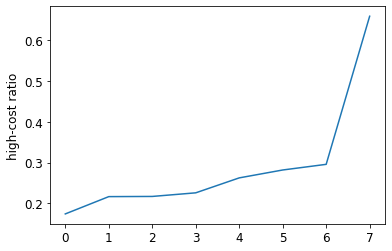

In [15]:
# just change the order of labels so that cost for each cluster goes from low to high

Labels = np.append(trainlabels, testlabels)

target= pd.DataFrame(np.append(ytrain, ytest,axis=0),columns=['Target'])
cadre = pd.DataFrame(Labels,columns=['Cadre'])

target['Cadre']= cadre['Cadre']

highcostratio = np.array([])
clustpop = np.array([])

for i in range(n_clusters):
    pop = target[target['Cadre']==i]['Target'].shape[0]
    clustpop = np.append(clustpop,pop)
    ratio = np.count_nonzero(target[target['Cadre']==i]['Target'].values)*1.0/pop
    highcostratio= np.append(highcostratio,ratio)
    
x = np.arange(n_clusters)
b=sns.lineplot(x=x,
               y=sorted(highcostratio))
plt.xticks(x,x)
#b.set_xlabel("X Label",fontsize=30)
b.set_ylabel("high-cost ratio",fontsize=12)
b.tick_params(labelsize=12)

In [16]:
# Order labels
sortedLabels = np.argsort( highcostratio ).tolist()
Labels2 = np.zeros( Labels.shape)-1
index = 0

for sortedNumber in sortedLabels:
    inNumber = np.where( Labels == sortedNumber)[0]
    Labels2[inNumber] = index
    index += 1
Labels = Labels2   

#save labels for later use
np.save('labels/new_match_cl.npy', Labels)

In [17]:
# #plot highcost ratio among cadres
# from highcostratio import highcostplot
# target,Labels,highcostratio,remove_index = highcostplot(d_newborn_tr,d_newborn_te, newborn_best)
# # the log odds ratios of being highcost in different clusters
from ftest_logodds import restest

restest(np.expand_dims(Labels,axis=1),
        np.expand_dims(target['Target'],axis=1)).round(2)



array([-0.51, -0.21, -0.24, -0.14,  0.08,  0.22,  0.26,  1.8 ])

In [18]:
# Calculate log odds ratios for feature vs. cluster, uncorr
from ftest_logodds import ftest_uncorr

features = list(d_newborn_tr.iloc[:,:-1])
data = np.append(d_newborn_tr.iloc[:,:-1],d_newborn_te.iloc[:,:-1],axis=0)
np_feat = np.asarray(features)
labs = np.expand_dims(Labels,axis=1)
feat_table,lor_table =ftest_uncorr(data,labs,np_feat)

In [19]:
feat_table.shape
print(testlabels.shape)

(13842,)


In [20]:
# reduce feature length
new_feat = [s.replace('CCS.DX_' , '') for s in features]
new_feat = [s.replace('CCS.PROC_' , '') for s in new_feat]
new_feat = [s.replace(' not mental disorders or infectious disease','')for s in new_feat]
new_feat = [s.replace('birth weight; and','BW&')for s in new_feat]
new_feat = [s.replace('sexually transmitted disease','STD')for s in new_feat]
new_feat = [s.replace('tuberculosis','TB')for s in new_feat]
new_feat = [s.replace('system','syst')for s in new_feat]
new_feat = [s.replace('Other','Ot')for s in new_feat]
new_feat = [s.replace('OTHER','Ot')for s in new_feat]

In [21]:
len(new_feat)

168

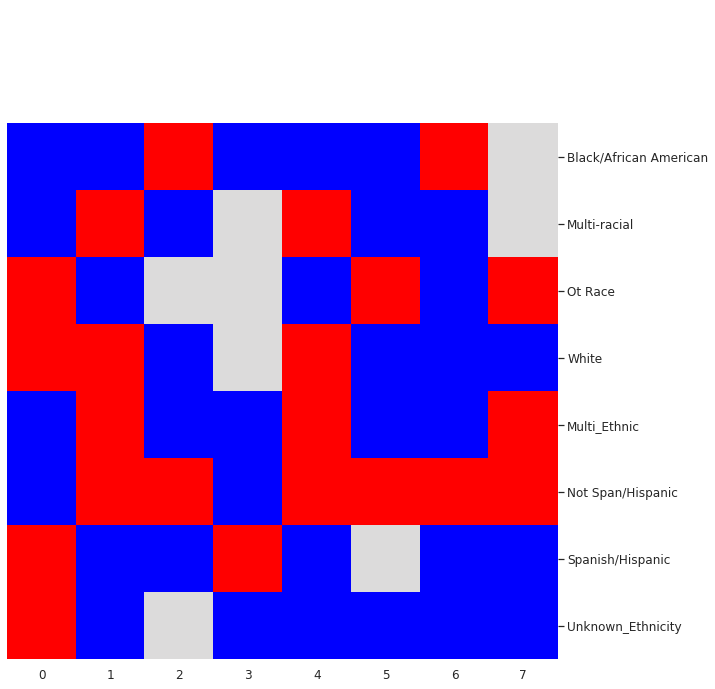

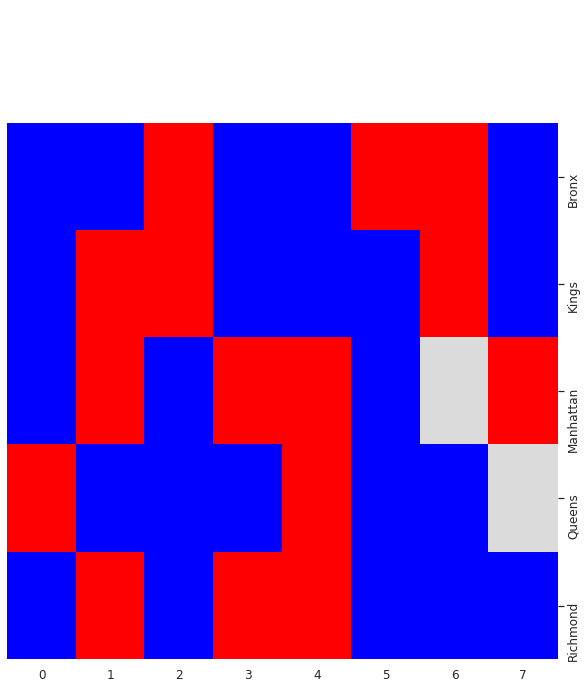

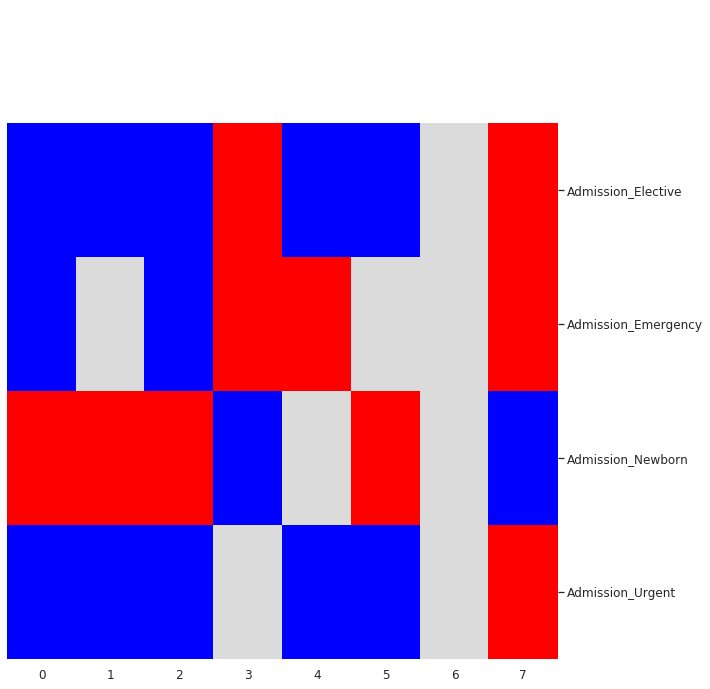

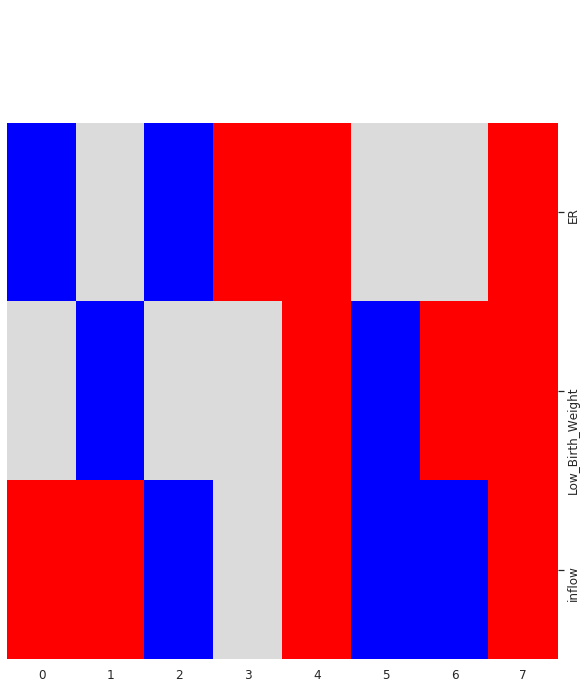

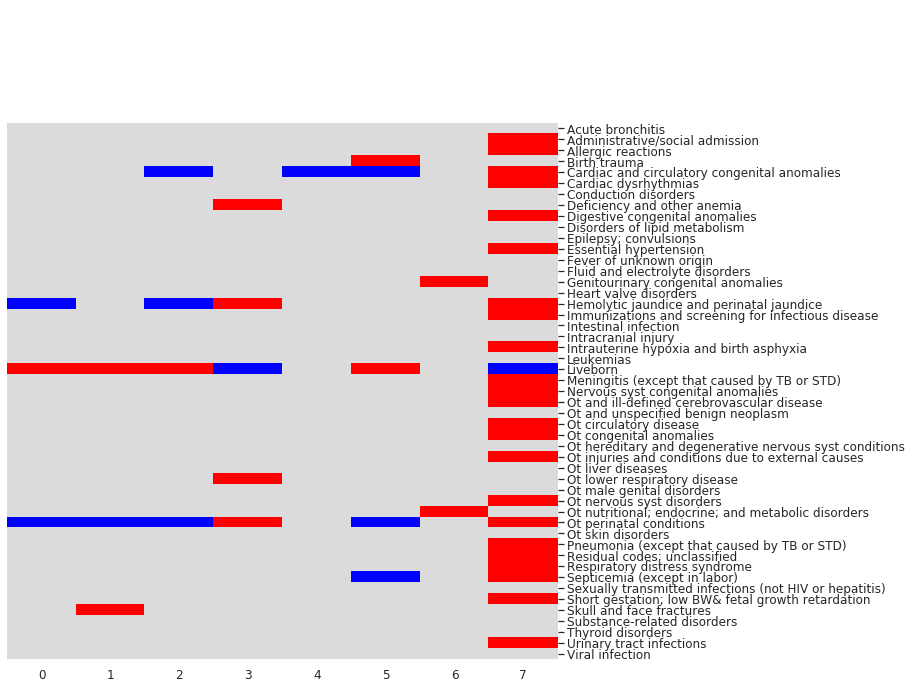

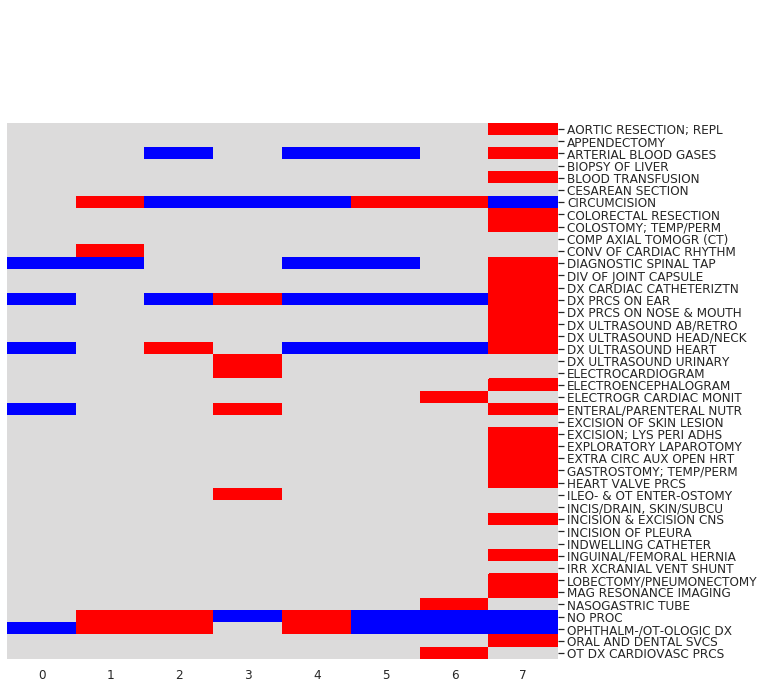

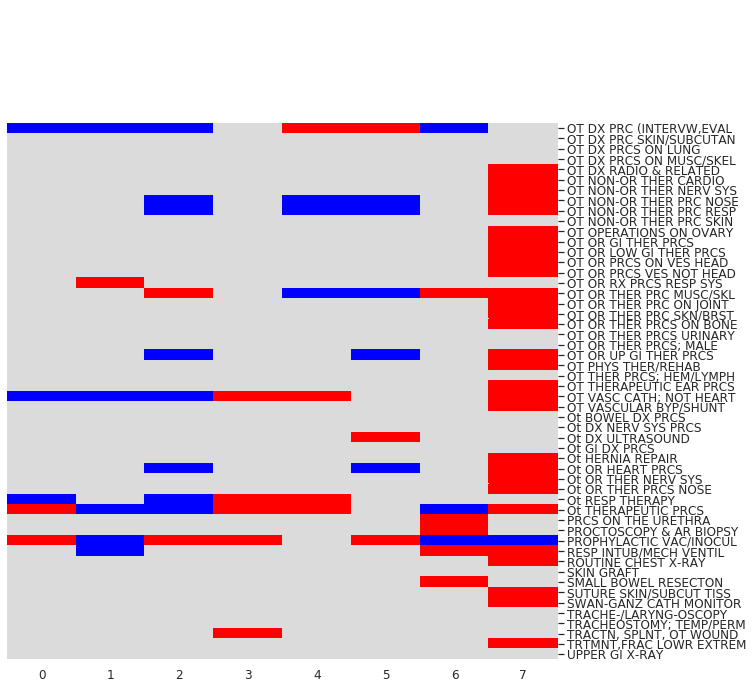

In [29]:
# clustermaps of segments of features.
# Red indicates a given feature has significant positive log ordds ratio to a given cluster, 
# light purple no significance, blue significant negative.
from clustmap import plotclustmap

sns.set(font_scale=1.1)
# racial features
plotclustmap(feat_table[:,11:19].T, None, np.array(new_feat)[11:19], None, None)
plt.yticks(rotation=0) 
# county features
plotclustmap(feat_table[:,3:8].T,None, np.array(new_feat)[3:8],None,None)
plt.yticks(rotation=0)

# # # admission features
plotclustmap(feat_table[:,19:23].T,None,np.array(new_feat)[19:23],None,None)
plt.yticks(rotation=0)

# ER, Low BW, Inflow
plotclustmap(feat_table[:,0:3].T,None,np.array(new_feat)[0:3],None,None)
plt.yticks(rotation=0)

# # #disease features
plotclustmap(feat_table[:,23:72].T,None,np.array(new_feat)[23:72],None,None)
# # # procedure features
plotclustmap(feat_table[:,72:116].T,None,np.array(new_feat)[72:116],None,None)
plotclustmap(feat_table[:,116:].T,None,np.array(new_feat)[116:],None,None)

In [26]:
weights = np.array(model.weights)
print(weights.shape)
print(len(new_feat))
weights = weights[:,1:]

(8, 169)
168


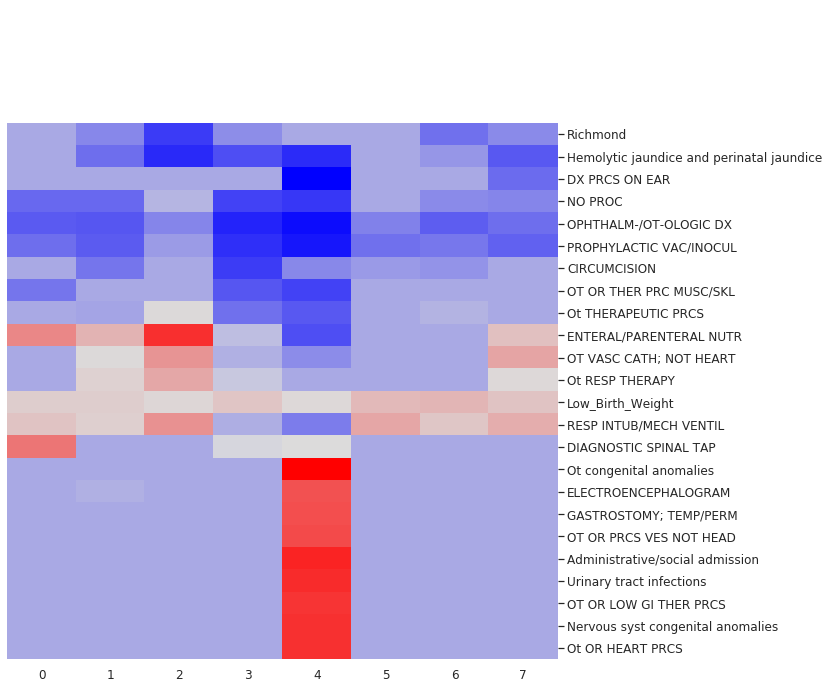

In [24]:
# plot the weights
N = weights.shape[0]
from clustmap import plotclustmap
th = 0.55
plotclustmap(weights.T[abs(weights.T).sum(axis = 1)/N > th],None, 
             np.array(new_feat)[abs(weights.T).sum(axis = 1)/N > th], None, None)